In [4]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [5]:
data = pd.read_csv("data/Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data.shape

(400, 9)

In [9]:
data.loc[data['Chance of Admit '] < 0.65, 'isAdmit'] = 0
data.loc[data['Chance of Admit '] >= 0.65, 'isAdmit'] = 1
data.isAdmit

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: isAdmit, Length: 400, dtype: float64

In [10]:
np.unique(data.isAdmit)

array([0., 1.])

In [11]:
target = data.iloc[:, -1]
new_data = data.iloc[:, :-2]

new_data.shape, target.shape

((400, 8), (400,))

In [12]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    new_data, target, test_size=0.6, random_state=1
)

In [13]:
data_X_train.shape, data_X_test.shape, data_y_train.shape, data_y_test.shape

((160, 8), (240, 8), (160,), (240,))

In [14]:
cl1_1 = KNeighborsClassifier(n_neighbors=50)
cl1_1.fit(data_X_train, data_y_train)
target1_0 = cl1_1.predict(data_X_train)
target1_1 = cl1_1.predict(data_X_test)
accuracy_score(data_y_train, target1_0), accuracy_score(data_y_test, target1_1)

(0.775, 0.6791666666666667)

In [15]:
cl1_2 = KNeighborsClassifier(n_neighbors=15)
cl1_2.fit(data_X_train, data_y_train)
target2_0 = cl1_2.predict(data_X_train)
target2_1 = cl1_2.predict(data_X_test)
accuracy_score(data_y_train, target2_0), accuracy_score(data_y_test, target2_1)

(0.8, 0.7416666666666667)

In [16]:
cl1_3 = KNeighborsClassifier(n_neighbors=3)
cl1_3.fit(data_X_train, data_y_train)
target3_0 = cl1_3.predict(data_X_train)
target3_1 = cl1_3.predict(data_X_test)
accuracy_score(data_y_train, target3_0), accuracy_score(data_y_test, target3_1)

(0.925, 0.8416666666666667)

In [17]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=5)
scores1, np.mean(scores1)

(array([0.3125, 0.375 , 0.725 , 0.7125, 0.7125]), 0.5675)

In [18]:
scores2 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=5, scoring='jaccard')
scores2, np.mean(scores2)

(array([0.05172414, 0.32432432, 0.72151899, 0.7125    , 0.7125    ]),
 0.5045134899194261)

In [19]:
scores3 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=3, scoring='f1')
scores3, np.mean(scores3)

(array([0.30088496, 0.83842795, 0.83333333]), 0.6575487455612663)

In [20]:
scoring = {
    'accuracy': 'accuracy',
    'jaccard': 'jaccard',
    'f1': 'f1'
}

scores = cross_validate(KNeighborsClassifier(n_neighbors=15), 
                        new_data, target, scoring=scoring, 
                        cv=5, return_train_score=True)
scores

{'fit_time': array([0.0041759 , 0.00535512, 0.00380874, 0.00289202, 0.00270391]),
 'score_time': array([0.00773597, 0.00948405, 0.00598621, 0.00620818, 0.00646305]),
 'test_accuracy': array([0.3125, 0.375 , 0.725 , 0.7125, 0.7125]),
 'train_accuracy': array([0.875   , 0.85    , 0.86875 , 0.896875, 0.846875]),
 'test_jaccard': array([0.05172414, 0.32432432, 0.72151899, 0.7125    , 0.7125    ]),
 'train_jaccard': array([0.84848485, 0.82222222, 0.84150943, 0.87007874, 0.82051282]),
 'test_f1': array([0.09836066, 0.48979592, 0.83823529, 0.83211679, 0.83211679]),
 'train_f1': array([0.91803279, 0.90243902, 0.91393443, 0.93052632, 0.90140845])}

In [21]:
%%time
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=LeaveOneOut())
scores, np.mean(scores)

CPU times: user 2.1 s, sys: 11.4 ms, total: 2.12 s
Wall time: 2.12 s


(array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [22]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         new_data, target, 
                         cv=kf)
scores

array([0.625 , 0.8375, 0.85  , 0.825 , 0.675 ])

In [23]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [24]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(data_X_train, data_y_train)

CPU times: user 328 ms, sys: 4.41 ms, total: 332 ms
Wall time: 331 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [25]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00418911, 0.00310893, 0.00234632, 0.00227356, 0.00249519,
        0.00247216, 0.00263834, 0.00262976, 0.00273895, 0.00300136]),
 'std_fit_time': array([8.10410564e-04, 6.57360508e-04, 6.95146810e-05, 3.57335289e-05,
        1.18705697e-04, 1.57299537e-04, 2.62595873e-04, 2.45222149e-04,
        2.56650397e-04, 6.29796919e-04]),
 'mean_score_time': array([0.00497975, 0.00332022, 0.00286875, 0.00279269, 0.00287619,
        0.0032021 , 0.00304523, 0.00344524, 0.00356421, 0.00327277]),
 'std_score_time': array([9.24315673e-04, 4.02377024e-04, 2.48063211e-04, 1.10385753e-04,
        7.49169602e-05, 2.80804726e-04, 1.67806753e-04, 4.73874487e-04,
        4.32244365e-04, 1.65551310e-04]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_

In [26]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [27]:
clf_gs.best_score_

0.78125

In [28]:
clf_gs.best_params_

{'n_neighbors': 20}

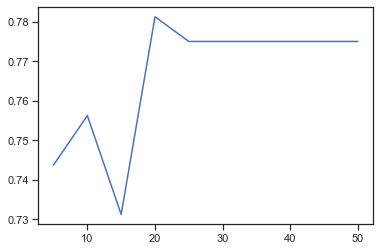

In [29]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [30]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/paulik/Универ/Гапанюк/env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

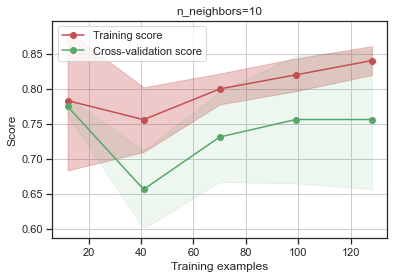

In [31]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), 'n_neighbors=10', 
                    data_X_train, data_y_train, cv=5)

In [32]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/paulik/Универ/Гапанюк/env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

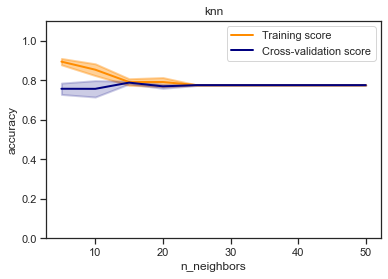

In [33]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      data_X_train, data_y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=3, scoring="accuracy")